# Construcción del primer modelo


**Descripción:** Este algortimo tiene como finalidad predecir la cantidad de nuevas muertes presentadas en un determinado país. Se selecciona para este modelo el país de Argentina, ya que establece una cantidad de datos mayor, en comparación con las otras regiones.

## Ejecución de librerias y carga de datos

Lo primero es instalar las librerias que son necesarias para el proyecto y establecer el archivo kaggle.json para poder descargar el dataset de información directamente

In [ ]:
#Instalo librerías que me van a ser útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import learning_curve


In [ ]:
#Importamos los archivos de colab
from google.colab import files

#Subimos el .json
files.upload() #buscan el archivo kaggle.json en su ordenador

#Reubicamos el .json y descargamos el set de datos
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


# **Set de datos**
El set de datos sigue la línea del Covid-19, ya que contiene información de esta enfermedad recopilada alrededor de casi todo el mundo. Algunas de las columnas que nos llamaron la atención fueron las siguientes:


*   **location:** Contiene el país a donde está asociado el registro
*   **date:** Contiene la fecha del registro
*   **total_cases:** Contiene el conteo de casos positivos totales hasta el momento
*   **new_cases:** Contiene la información de nuevos casos de Covid reportados.
*   **total_deaths:** Contiene la información de las muertes causadas por el covid hasta ese día.
*   **new_deaths:** Contiene la información de las nuevas muertes reportadas en esa fecha.
*   **icu_patients:** Contiene el conteo de pacientes en UCI hasta ese día.
*   **hosp_patients:** Contiene el conteo de pacientes que han sido hospitalizados hasta el momento.
*   **people_vaccinated:** Contiene el conteo de personas que han sido vacunadas hasta el momento.
*   **new_vaccinations:** Contiene el número de nuevos vacunados ese día.

Entre otras columnas que nos dan información respecto a la tasa de contagio, edad de las personas, mortalidad acumulativa, desarrollo humano, etc.

Lo primero será realizar un análisis exploratorio de datos para determinar las caracteristicas y la salida de los datos que se implementara en la predicción.





In [ ]:
#Se descarga el nuevo set de datos
!kaggle datasets download -d georgesaavedra/covid19-dataset

 88% 8.00M/9.09M [00:01<00:00, 11.9MB/s]
100% 9.09M/9.09M [00:01<00:00, 7.91MB/s]


In [ ]:
#Se descomprime
!unzip /content/covid19-dataset.zip

Archive:  /content/covid19-dataset.zip
  inflating: owid-covid-data.csv     


In [ ]:
#Visualizo el set
dataset=pd.read_csv('owid-covid-data.csv')
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [ ]:
#Se cuenta el número de registros por pais para saber cuál es mejor para tomar
paises=[]
cantidad=[]

#Recorro los paises
for pais in dataset["location"].unique().tolist():
  paises.append(pais)
  cantidad.append(dataset[dataset["location"]==pais].count()[0])

#Ahora genero la tabla de pandas
countries = pd.DataFrame(data={'Pais': paises, 'Cantidad de datos': cantidad})
countries

,Pais,Cantidad de datos
0,Afghanistan,741
1,Africa,752
2,Albania,740
3,Algeria,740
4,Andorra,734
...,...,...
233,Wallis and Futuna,503
234,World,774
235,Yemen,695
236,Zambia,718


In [ ]:
#Selecciono el que más datos tenga
countries[countries["Cantidad de datos"]==np.max(countries["Cantidad de datos"])]

,Pais,Cantidad de datos
8,Argentina,795
136,Mexico,795


Debido a que Argentina es uno de los paises que presenta mayor cantidad de datos, se realizara en primera instancia la predicción de la cantidad nuevos casos de Covid-19 en dicho lugar.

In [ ]:
#Evaluación del dataframe de Argentina
country = "Argentina"
df_Arg=dataset[dataset['location']==country].copy()
df_Arg

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
5854,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
5855,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
5856,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
5857,ARG,South America,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
5858,ARG,South America,Argentina,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6644,ARG,South America,Argentina,2022-03-01,8904176.0,3520.0,6936.000,126257.0,105.0,91.286,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6645,ARG,South America,Argentina,2022-03-02,8912317.0,8141.0,6304.143,126390.0,133.0,87.857,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6646,ARG,South America,Argentina,2022-03-03,8921536.0,9219.0,6150.000,126531.0,141.0,94.143,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6647,ARG,South America,Argentina,2022-03-04,8929898.0,8362.0,5989.286,126624.0,93.0,95.143,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN


In [ ]:
#Columnas que presenta el set de datos
columns_names = df_Arg.columns.values
columns_names

array(['iso_code', 'continent', 'location', 'date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',
       'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'new_vaccinations_smoothed', 't

In [ ]:
#Analizar los tipos de datos que presenta cada columna
for c in df_Arg.columns:
    print ("%20s"%c, df_Arg[c].dtype)

            iso_code object
           continent object
            location object
                date object
         total_cases float64
           new_cases float64
  new_cases_smoothed float64
        total_deaths float64
          new_deaths float64
 new_deaths_smoothed float64
total_cases_per_million float64
new_cases_per_million float64
new_cases_smoothed_per_million float64
total_deaths_per_million float64
new_deaths_per_million float64
new_deaths_smoothed_per_million float64
   reproduction_rate float64
        icu_patients float64
icu_patients_per_million float64
       hosp_patients float64
hosp_patients_per_million float64
weekly_icu_admissions float64
weekly_icu_admissions_per_million float64
weekly_hosp_admissions float64
weekly_hosp_admissions_per_million float64
           new_tests float64
         total_tests float64
total_tests_per_thousand float64
new_tests_per_thousand float64
  new_tests_smoothed float64
new_tests_smoothed_per_thousand float64
       positive_ra

In [ ]:
#Se inspecciona las columnas númericas
df_Arg._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,733.0,2.861119e+06,2.522202e+06,1.000000,439172.000000,2.133963e+06,5.199919e+06,8.934328e+06
new_cases,733.0,1.218871e+04,1.948173e+04,0.000000,1881.000000,7.208000e+03,1.345600e+04,1.398530e+05
new_cases_smoothed,727.0,1.226175e+04,1.870885e+04,1.714000,2003.571000,7.102143e+03,1.321186e+04,1.140181e+05
total_deaths,728.0,5.943860e+04,4.576915e+04,1.000000,9829.000000,5.287500e+04,1.124608e+05,1.267080e+05
new_deaths,728.0,1.740495e+02,2.043303e+02,0.000000,28.000000,1.265000e+02,2.570000e+02,3.351000e+03
...,...,...,...,...,...,...,...,...
human_development_index,795.0,8.450000e-01,1.110922e-16,0.845000,0.845000,8.450000e-01,8.450000e-01,8.450000e-01
excess_mortality_cumulative_absolute,12.0,7.686900e+03,1.680298e+04,-7413.600000,-1912.525000,-5.202500e+02,1.397893e+04,4.194820e+04
excess_mortality_cumulative,12.0,1.708333e+00,5.898368e+00,-4.510000,-2.567500,-6.700000e-01,5.150000e+00,1.245000e+01
excess_mortality,12.0,1.291917e+01,2.135245e+01,-12.660000,-3.077500,3.435000e+00,3.070250e+01,5.196000e+01


In [ ]:
#Eliminación de datos vacios en la columna de nuevos casos, ya que esta sera la variable que se desea predecir
df_Arg = df_Arg.dropna(subset=["new_deaths"])
df_Arg


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
5921,ARG,South America,Argentina,2020-03-08,12.0,4.0,NaN,1.0,1.0,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
5922,ARG,South America,Argentina,2020-03-09,12.0,0.0,1.714,1.0,0.0,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
5923,ARG,South America,Argentina,2020-03-10,17.0,5.0,2.286,1.0,0.0,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
5924,ARG,South America,Argentina,2020-03-11,19.0,2.0,2.571,1.0,0.0,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
5925,ARG,South America,Argentina,2020-03-12,19.0,0.0,2.571,1.0,0.0,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6644,ARG,South America,Argentina,2022-03-01,8904176.0,3520.0,6936.000,126257.0,105.0,91.286,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6645,ARG,South America,Argentina,2022-03-02,8912317.0,8141.0,6304.143,126390.0,133.0,87.857,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6646,ARG,South America,Argentina,2022-03-03,8921536.0,9219.0,6150.000,126531.0,141.0,94.143,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6647,ARG,South America,Argentina,2022-03-04,8929898.0,8362.0,5989.286,126624.0,93.0,95.143,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN


In [ ]:
#Creación de un dato sintetico
#tasa de muertos en Argentina
death_rate = df_Arg.loc[:,['continent', 'location','total_deaths','total_cases']]
death_rate["death_rate"] = round((df_Arg["total_deaths"]/df_Arg["total_cases"])*100,2)
death_rate

,continent,location,total_deaths,total_cases,death_rate
5921,South America,Argentina,1.0,12.0,8.33
5922,South America,Argentina,1.0,12.0,8.33
5923,South America,Argentina,1.0,17.0,5.88
5924,South America,Argentina,1.0,19.0,5.26
5925,South America,Argentina,1.0,19.0,5.26
...,...,...,...,...,...
6644,South America,Argentina,126257.0,8904176.0,1.42
6645,South America,Argentina,126390.0,8912317.0,1.42
6646,South America,Argentina,126531.0,8921536.0,1.42
6647,South America,Argentina,126624.0,8929898.0,1.42


## **Procesamiento de atributos y de etiquetas**

Se selecciona los atributos a utilizar con el fin de predecir la cantidad de nuevas muertes de covid 19, para esto se tendran en cuenta datos como la vacunación, los nuevos casos, casos totales y la cantidad de muertes registradas

In [ ]:
def preprocess_features(df):#procesamos los atributos

  selected_features = df[
    ["total_cases",
     "new_cases",
     "total_deaths",
     "people_vaccinated_per_hundred",
     "people_fully_vaccinated_per_hundred",
     "total_vaccinations",
     "people_vaccinated",
     "people_fully_vaccinated",
     "new_cases_per_million"]]
  processed_features = selected_features.copy()
  # Creación de atributo sintetico.
  processed_features["death_rate"] = round((df["total_deaths"]/df["total_cases"])*100,2)

  return processed_features

def preprocess_targets(df): #procesamos los datos de salida

  output_targets = pd.DataFrame()
  output_targets["new_deaths"] = (df["new_deaths"])
  return output_targets

In [ ]:
print(df_Arg.shape)

(728, 67)


## Separación de los datos de entrenamiento y datos de validación

In [ ]:
#Se realiza la separación de los datos de entrenamiento, datos de validación
#Se selecciona 582 datos para entrenamiento, el cual corresponde aproximadamente al 80% de los datos de Argentina
training_examples = preprocess_features(df_Arg.head(582))
training_targets = preprocess_targets(df_Arg.head(582))

#Se escoge 146 datos para validación
validation_examples = preprocess_features(df_Arg.tail(146))
validation_targets = preprocess_targets(df_Arg.tail(146))

#Se realiza
print("Training examples summary:")
display.display(training_examples.describe())
display.display(training_examples.shape)
print("Validation examples summary:")
display.display(validation_examples.describe())
display.display(validation_examples.shape)

print("Training targets summary:")
display.display(training_targets.describe())
display.display(training_targets.shape)
print("Validation targets summary:")
display.display(validation_targets.describe())
display.display(validation_targets.shape)


Training examples summary:


,total_cases,new_cases,total_deaths,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_cases_per_million,death_rate
count,5.820000e+02,582.000000,582.000000,259.000000,259.000000,2.650000e+02,2.590000e+02,2.590000e+02,582.000000,582.000000
mean,1.977426e+06,9047.853952,44573.402062,29.610309,12.529537,1.878063e+07,1.350398e+07,5.714232e+06,198.392529,2.578230
std,1.823043e+06,8190.209290,38916.397497,23.854635,15.250497,1.736488e+07,1.087906e+07,6.955097e+06,179.586904,0.858006
min,1.200000e+01,0.000000,1.000000,0.530000,0.010000,7.000000e+02,2.435390e+05,4.394000e+03,0.000000,1.330000
25%,1.926122e+05,2530.000000,3556.250000,6.635000,1.465000,3.365839e+06,3.026906e+06,6.684110e+05,55.475500,2.130000
50%,1.563865e+06,7479.500000,42314.000000,21.760000,6.310000,1.211990e+07,9.924476e+06,2.876639e+06,164.003000,2.305000
75%,3.362622e+06,12607.500000,71585.000000,56.745000,17.665000,3.333593e+07,2.587854e+07,8.056518e+06,276.445250,2.670000
max,5.265859e+06,41080.000000,115473.000000,66.320000,52.220000,5.398066e+07,3.024496e+07,2.381340e+07,900.762000,8.330000


(582, 10)

Validation examples summary:


,total_cases,new_cases,total_deaths,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_cases_per_million,death_rate
count,1.460000e+02,146.000000,146.000000,124.000000,124.000000,1.240000e+02,1.240000e+02,1.240000e+02,146.000000,146.000000
mean,6.481768e+06,25126.500000,118695.760274,81.816290,68.419435,7.520404e+07,3.731305e+07,3.120331e+07,550.949404,1.906712
std,1.477007e+06,37867.826847,3465.640693,5.831043,8.439995,1.245330e+07,2.659385e+06,3.849295e+06,830.328725,0.337371
min,5.266275e+06,400.000000,115491.000000,66.360000,52.470000,5.411589e+07,3.026520e+07,2.392899e+07,8.771000,1.420000
25%,5.309169e+06,1493.250000,116298.750000,78.522500,60.182500,6.399020e+07,3.581256e+07,2.744489e+07,32.742750,1.462500
50%,5.422229e+06,5060.000000,116971.500000,82.810000,70.015000,7.422085e+07,3.776698e+07,3.193145e+07,110.950500,2.155000
75%,8.255665e+06,31405.500000,120580.750000,86.895000,76.152500,8.730400e+07,3.963013e+07,3.472881e+07,688.629000,2.190000
max,8.934328e+06,139853.000000,126708.000000,88.590000,79.390000,9.408118e+07,4.040344e+07,3.620651e+07,3066.560000,2.190000


(146, 10)

Training targets summary:


,new_deaths
count,582.000000
mean,198.407216
std,217.616578
min,0.000000
25%,49.250000
50%,151.000000
75%,279.000000
max,3351.000000


(582, 1)

Validation targets summary:


,new_deaths
count,146.000000
mean,76.952055
std,87.757765
min,3.000000
25%,19.000000
50%,33.000000
75%,118.500000
max,333.000000


(146, 1)

##Matriz de correlación

Una **matriz de correlaciones** muestra correlaciones entre pares de atributos en comparación con el objetivo y para cada atributo en comparación con otros atributos.

Los valores de correlación tienen los siguientes significados:

  * `-1.0`: correlación negativa perfecta
  * `0.0`: no existe correlación
  * `1.0`: correlación positiva perfecta

In [ ]:
#mirar la correlacion de datos, para ver si los atributos se encuentran correlacionados con el objetivo
correlation_dataframe = training_examples.copy()
correlation_dataframe["target"] = training_targets["new_deaths"]

correlation_dataframe.corr()

,total_cases,new_cases,total_deaths,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_cases_per_million,death_rate,target
total_cases,1.000000,0.402897,0.996055,0.977705,0.808654,0.938073,0.977705,0.808654,0.402897,-0.410681,0.322834
new_cases,0.402897,1.000000,0.390738,-0.306776,-0.502717,-0.384543,-0.306771,-0.502733,1.000000,-0.396150,0.692896
total_deaths,0.996055,0.390738,1.000000,0.991604,0.848726,0.962707,0.991604,0.848728,0.390738,-0.408846,0.314038
people_vaccinated_per_hundred,0.977705,-0.306776,0.991604,1.000000,0.884263,0.982391,1.000000,0.884268,-0.306776,-0.642614,-0.084275
people_fully_vaccinated_per_hundred,0.808654,-0.502717,0.848726,0.884263,1.000000,0.955943,0.884262,1.000000,-0.502717,-0.378538,-0.331922
total_vaccinations,0.938073,-0.384543,0.962707,0.982391,0.955943,1.000000,0.982390,0.955946,-0.384543,-0.569346,-0.164638
people_vaccinated,0.977705,-0.306771,0.991604,1.000000,0.884262,0.982390,1.000000,0.884266,-0.306771,-0.642620,-0.084276
people_fully_vaccinated,0.808654,-0.502733,0.848728,0.884268,1.000000,0.955946,0.884266,1.000000,-0.502733,-0.378531,-0.331943
new_cases_per_million,0.402897,1.000000,0.390738,-0.306776,-0.502717,-0.384543,-0.306771,-0.502733,1.000000,-0.396150,0.692896
death_rate,-0.410681,-0.396150,-0.408846,-0.642614,-0.378538,-0.569346,-0.642620,-0.378531,-0.396150,1.000000,-0.300921


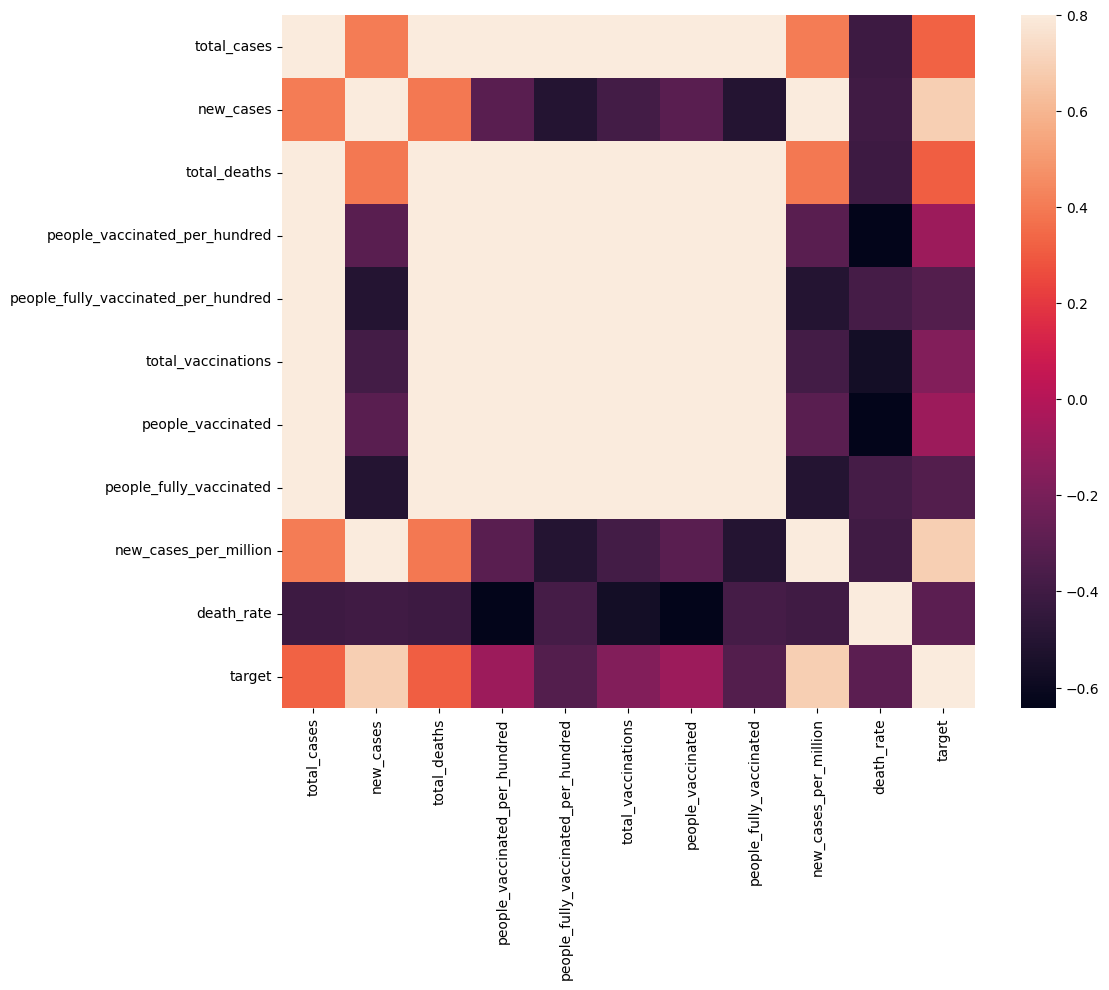

In [ ]:
#correlation matrix, figura
import seaborn as sns
corrmat = correlation_dataframe.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
#Comprobar que no presenta valores vacios
print(training_examples.isnull().sum())
print(training_targets.isnull().sum())
print(validation_examples.isnull().sum())

total_cases                              0
new_cases                                0
total_deaths                             0
people_vaccinated_per_hundred          323
people_fully_vaccinated_per_hundred    323
total_vaccinations                     317
people_vaccinated                      323
people_fully_vaccinated                323
new_cases_per_million                    0
death_rate                               0
dtype: int64
new_deaths    0
dtype: int64
total_cases                             0
new_cases                               0
total_deaths                            0
people_vaccinated_per_hundred          22
people_fully_vaccinated_per_hundred    22
total_vaccinations                     22
people_vaccinated                      22
people_fully_vaccinated                22
new_cases_per_million                   0
death_rate                              0
dtype: int64


In [ ]:
 #Reemplazar valores vacios, utilizando el promedio de los datos
training_examples['people_vaccinated_per_hundred'] = training_examples.people_vaccinated_per_hundred.fillna(training_examples.people_vaccinated_per_hundred.mean())
training_examples['people_fully_vaccinated_per_hundred'] = training_examples.people_fully_vaccinated_per_hundred.fillna(training_examples.people_fully_vaccinated_per_hundred.mean())
training_examples['total_vaccinations'] = training_examples.total_vaccinations.fillna(training_examples.total_vaccinations.mean())
training_examples['people_vaccinated'] = training_examples.people_vaccinated.fillna(training_examples.people_vaccinated.mean())
training_examples['people_fully_vaccinated'] = training_examples.people_fully_vaccinated.fillna(training_examples.people_fully_vaccinated.mean())

validation_examples['people_vaccinated_per_hundred'] = validation_examples.people_vaccinated_per_hundred.fillna(validation_examples.people_vaccinated_per_hundred.mean())
validation_examples['people_fully_vaccinated_per_hundred'] = validation_examples.people_fully_vaccinated_per_hundred.fillna(validation_examples.people_fully_vaccinated_per_hundred.mean())
validation_examples['total_vaccinations'] = validation_examples.total_vaccinations.fillna(validation_examples.total_vaccinations.mean())
validation_examples['people_vaccinated'] = validation_examples.people_vaccinated.fillna(validation_examples.people_vaccinated.mean())
validation_examples['people_fully_vaccinated'] = validation_examples.people_fully_vaccinated.fillna(validation_examples.people_fully_vaccinated.mean())

In [ ]:
#Comprobar que no presenta valores vacios
print(training_examples.isnull().sum())
print(training_targets.isnull().sum())
print(validation_examples.isnull().sum())

total_cases                            0
new_cases                              0
total_deaths                           0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
new_cases_per_million                  0
death_rate                             0
dtype: int64
new_deaths    0
dtype: int64
total_cases                            0
new_cases                              0
total_deaths                           0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
new_cases_per_million                  0
death_rate                             0
dtype: int64


##Diagramas de dispersión

<Figure size 10000x10000 with 0 Axes>

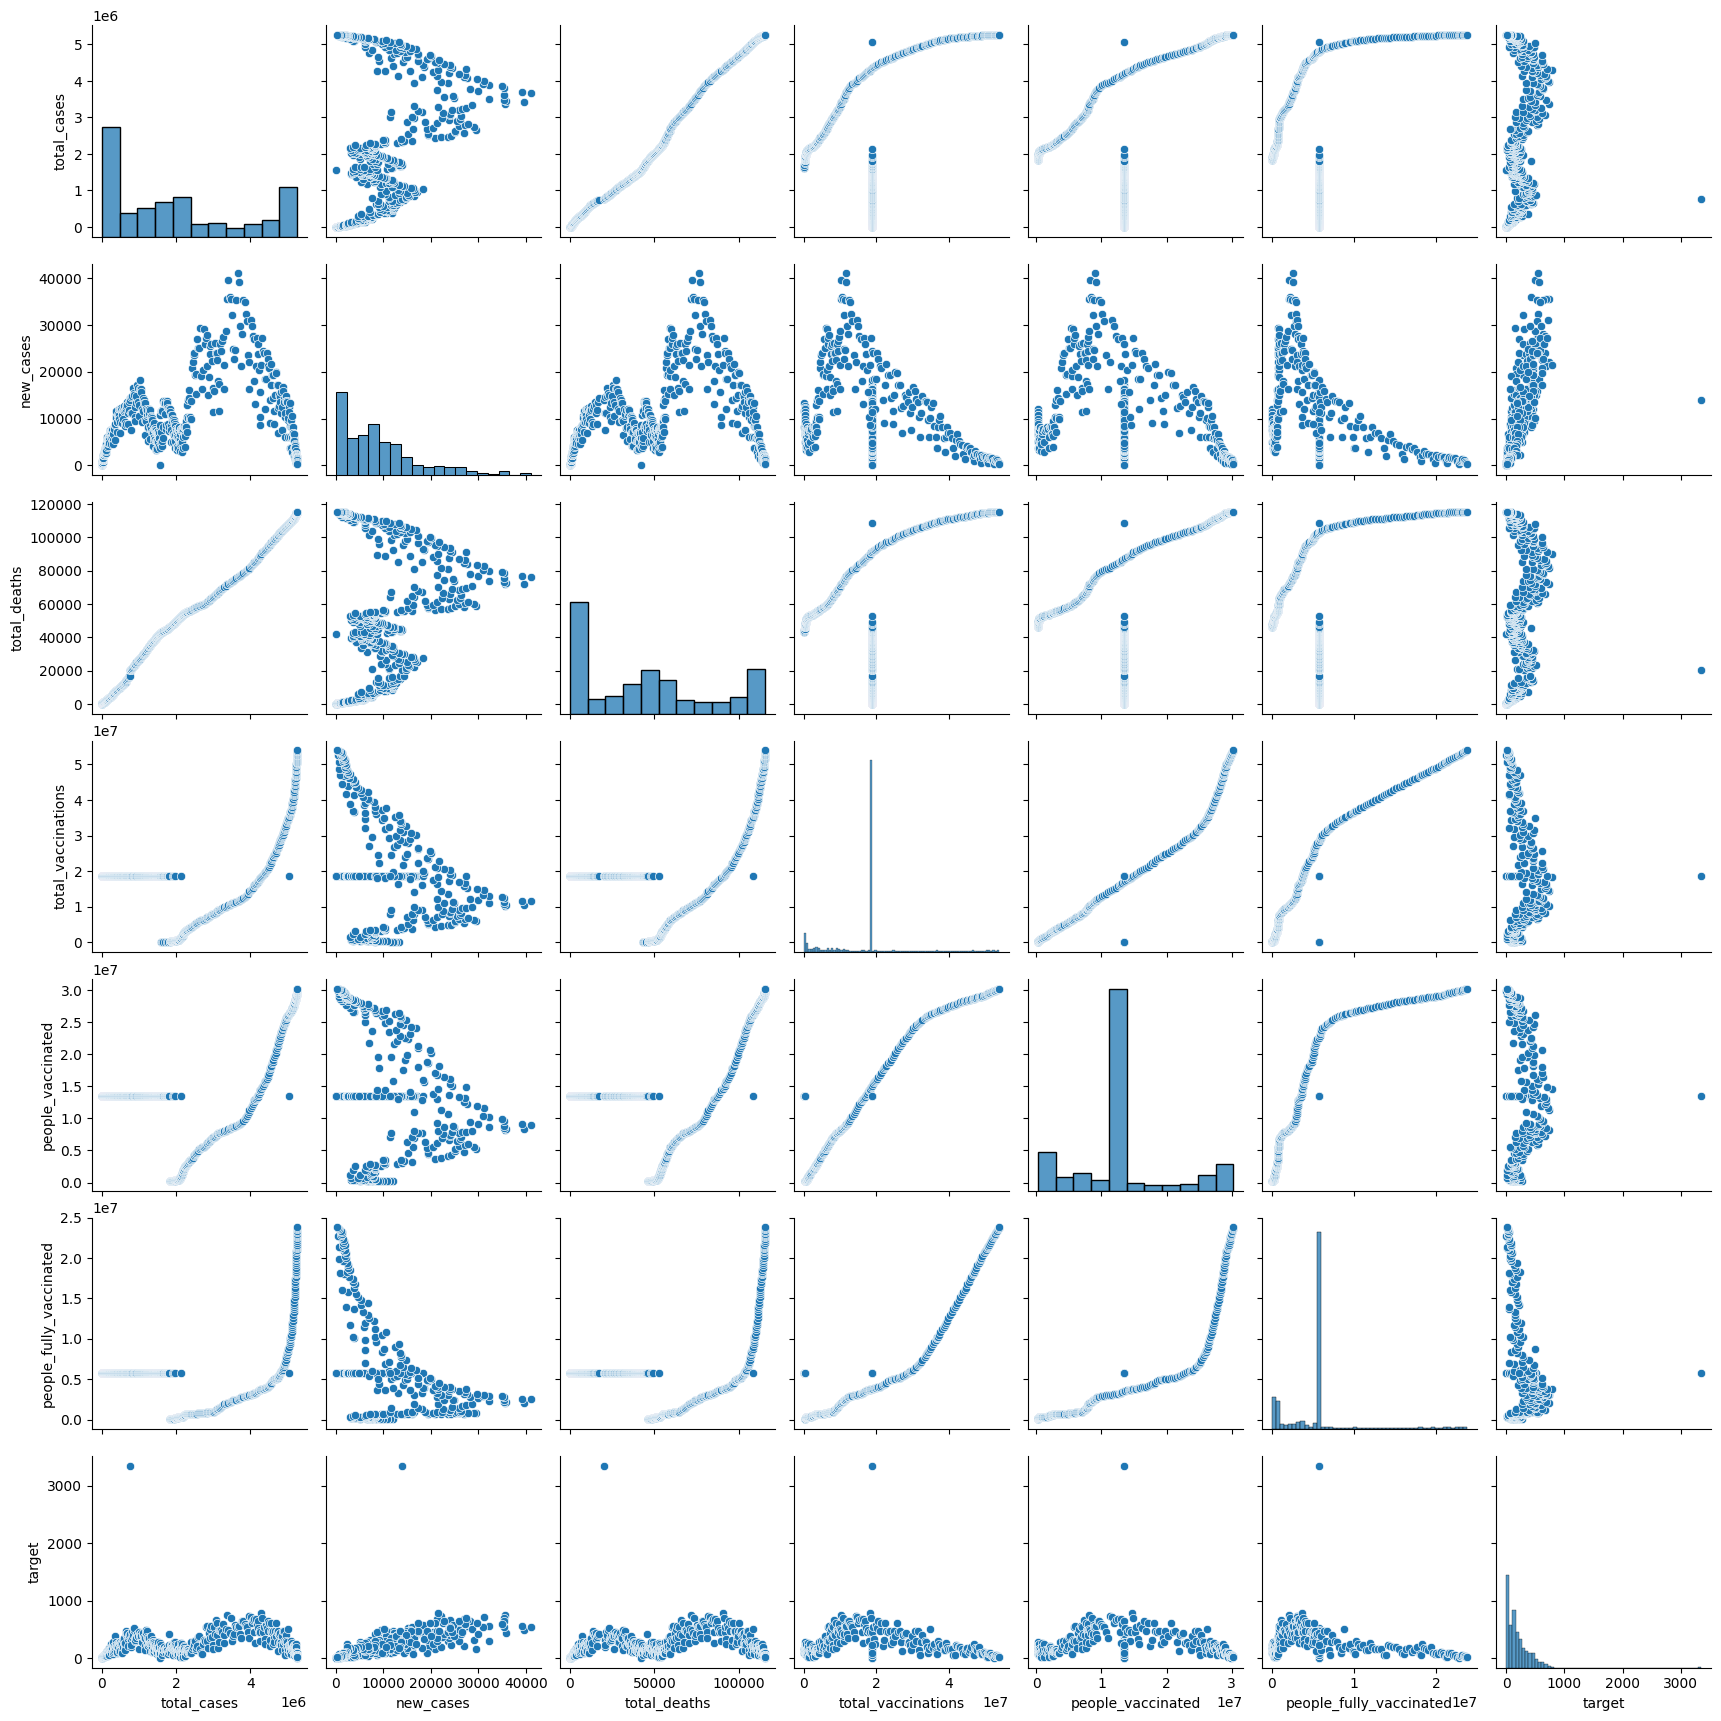

In [ ]:
#Evidenciar diagramas de dispersion para algunos atributos
dataframe_train = training_examples.copy()
dataframe_train["target"] = training_targets["new_deaths"]

cols = ["total_cases",
     "new_cases",
     "total_deaths",
     "total_vaccinations",
     "people_vaccinated",
     "people_fully_vaccinated",
     "target"]

plt.figure(figsize = (100,100))

sns.pairplot(dataframe_train[cols])

<Figure size 10000x10000 with 0 Axes>

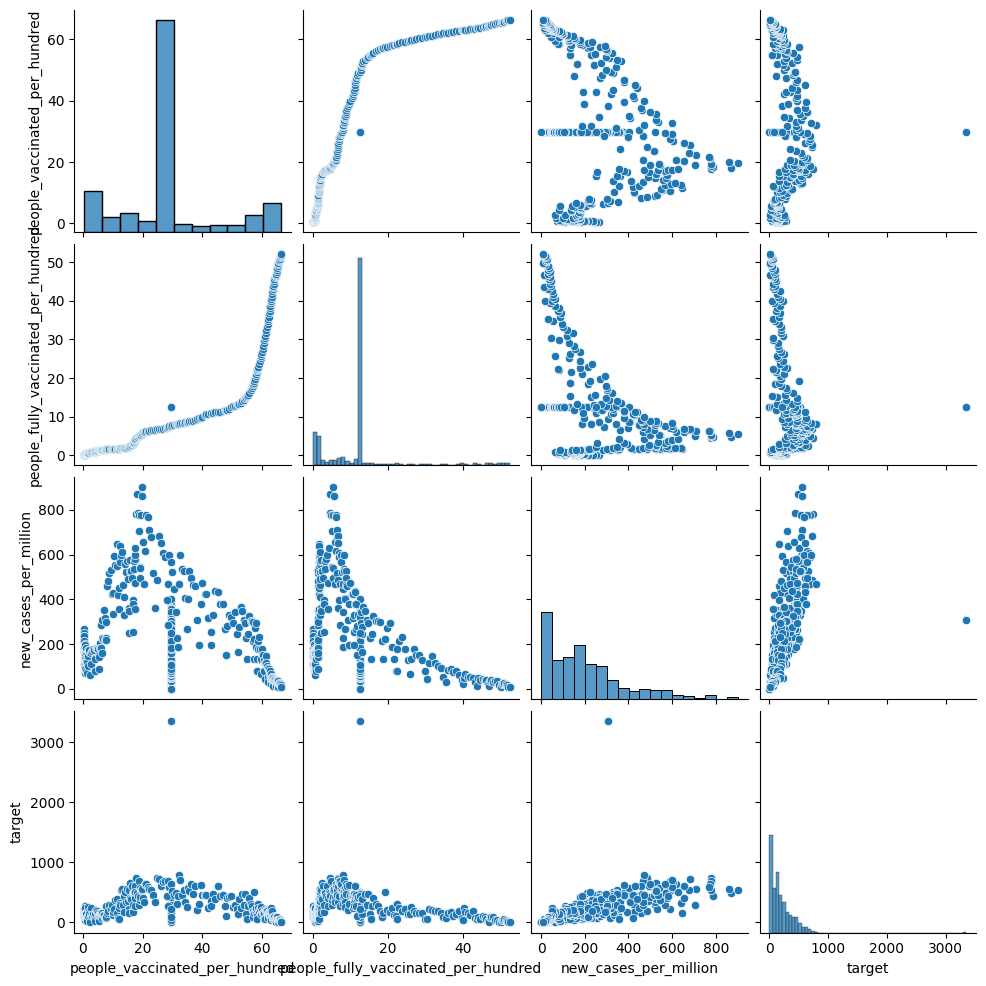

In [ ]:
#Evidenciar diagramas de dispersion para los atributos
dataframe_train = training_examples.copy()
dataframe_train["target"] = training_targets["new_deaths"]

cols = ["people_vaccinated_per_hundred",
     "people_fully_vaccinated_per_hundred",
     "new_cases_per_million",
     "target"]

plt.figure(figsize = (100,100))


sns.pairplot(dataframe_train[cols])

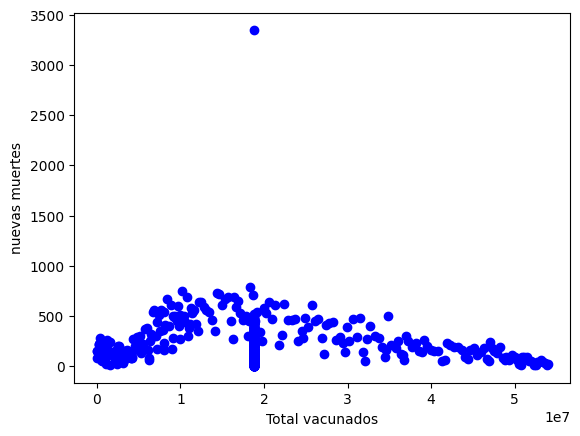

In [ ]:
#Se realiza el diagrama de dispersion para ver el comportamiento de algunos atributos respecto al target
plt.scatter(training_examples.total_vaccinations, training_targets.new_deaths,  color='blue')
plt.xlabel("Total vacunados")
plt.ylabel("nuevas muertes")
plt.show()

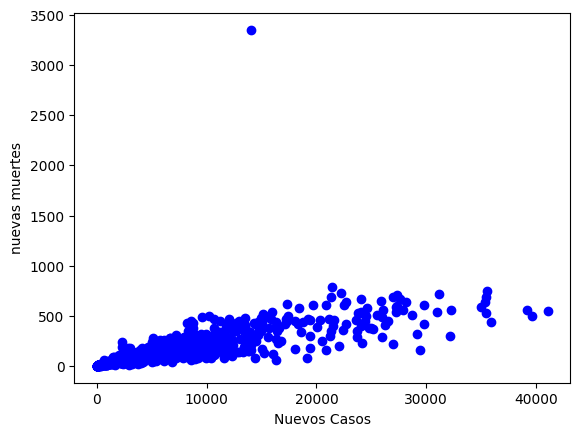

In [ ]:
plt.scatter(training_examples.new_cases, training_targets.new_deaths,  color='blue')
plt.xlabel("Nuevos Casos")
plt.ylabel("nuevas muertes")
plt.show()

In [ ]:
#creacion del modelo utilizando un solo atributo (nuevos casos)
from sklearn import linear_model
regression = linear_model.LinearRegression()
#train of data x and train of label y
train_x = np.asanyarray(training_examples[['new_cases']])
train_y = np.asanyarray(training_targets[['new_deaths']])

#entrenamiento del modelo
regression.fit(train_x, train_y)
# Coeficientes
print ('Coefficients: ', regression.coef_)
print ('Intercept: ',regression.intercept_)

Coefficients:  [[0.01841049]]
Intercept:  [31.83181192]


Text(0, 0.5, 'nuevas muertes')

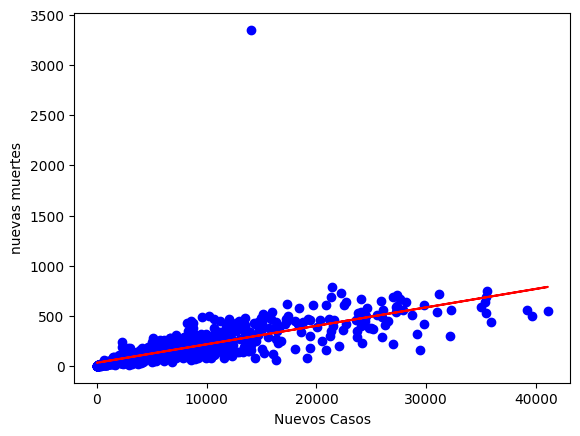

In [ ]:
plt.scatter(training_examples.new_cases, training_targets.new_deaths,  color='blue')
plt.plot(train_x, regression.coef_[0][0]*train_x + regression.intercept_[0], '-r') #regression lineal
plt.xlabel("Nuevos Casos")
plt.ylabel("nuevas muertes")

## Métricas de evaluación de modelos:

MSE : permite calcular la exactitud del modelo basado en el set de prueba:
- Error absoluto de media: Es una media del valor absoluto de los errores. Es la métrica más fácil de comprender ya que es el promedio de los errores.
- Error Cuadrado Medio (MSE): El Error Cuadrado Medio (MSE) es la media del error cuadrático. Es más popular que el error de Media absoluto ya que hace foco en grandes errores. Esto se debe a que el término cuadrático tiene errores más grandes que van aumentando su valor.
- Error Cuadrático Medio (RMSE).
- R-cuadrática: Esta metrica es una medida popular para darle precisión al modelo. Representa cuán cerca están los datos de la linea de regresión ajustada. Mientras más alto el R-cuadrático, mejor se encontrará ajustado el modelo respecto de los datos. El puntaje mejor posible es 1.0 y puede tomar valores negativos .

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(validation_examples[['new_cases']])
test_y = np.asanyarray(validation_targets[['new_deaths']])
test_y_predict = regression.predict(test_x)


print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_predict - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_predict - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_predict , test_y) )

Error medio absoluto: 417.65
Suma residual de los cuadrados (MSE): 611794.20
R2-score: -0.27


## Modelo de regresión lineal

En primer lugar se utilizara la separación de los datos de entrenamiento y de test realizada anteriormente, la cual corresponde para los datos de entrenamiento al 80% de los datos totales.

In [ ]:
# Regresion lineal
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate, ShuffleSplit

#Se crea el modelo
algoritmo = linear_model.LinearRegression()
#Se entrena el modelo
algoritmo.fit(training_examples,training_targets)

#Se realiza la predicción
Y_prediction = algoritmo.predict(validation_examples)
Y_validation = np.asanyarray(validation_targets[['new_deaths']])


#Se evaluan las metricas
print("Error medio absoluto: %.2f" % np.mean(np.absolute(Y_prediction - Y_validation)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((Y_prediction - Y_validation) ** 2))
print("R2-score: %.2f" % r2_score(Y_prediction , Y_validation))

scores_valid = algoritmo.score(validation_examples,validation_targets)
print(f'El promedio en validación es de: {round(scores_valid.mean(),4)}')


Error medio absoluto: 439.35
Suma residual de los cuadrados (MSE): 627055.12
R2-score: -0.22
El promedio en validación es de: -80.9822


Se implementará en segunda instancia la división de los datos utilizando el metodo de bootstrap, volver a muestrear y volver a colocar

In [ ]:
#Se utiliza la division de los datos implementando el metodo bootstrap
total_examples = pd.concat([training_examples, validation_examples])
total_target = pd.concat([training_targets, validation_targets])
from progressbar import progressbar as pbar
from sklearn.model_selection import train_test_split

def bootstrap_score(estimator, X, y, test_size):
  trscores, tsscores = [], []
  for _ in range(10):
    Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=test_size)
    estimator.fit(Xtr, ytr)
    Y_prediction = estimator.predict(Xts)
    Y_validation = np.asanyarray(yts[['new_deaths']])


  return (np.mean(np.absolute(Y_prediction - Y_validation)), r2_score(Y_prediction , Y_validation), np.mean((Y_prediction - Y_validation) ** 2), Xtr, ytr)

In [ ]:
#Metricas evaluadas
estimator = linear_model.LinearRegression()
(Error_medio, r2_score_ ,MSE, Xtr, ytr) = bootstrap_score(estimator, total_examples, total_target, test_size=0.3)
print (f'Error medio absoluto: {round(Error_medio,4)}')
print(f'Suma residual de los cuadrados (MSE): {round(MSE,4)}')
print (f'R2 score: {round(r2_score_,4)}')

Error medio absoluto: 87.5101
Suma residual de los cuadrados (MSE): 12363.9611
R2 score: 0.1075


## Curva de aprendizaje

In [ ]:
#Curva de aprendizaje
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Genera 3 graficas: La curva de prueba y la curva de aprendizaje, los datos
    de entrenamiento vs la curva de tiempos de ajuste, la curva de tiempos de
    ajuste frente a la puntuación.

    Parameters
    ----------
    estimator : instancia de estimador. Una instancia de estimador que implementa los métodos `fit` y `predict`
    que se clonará para cada validación.

    title : str

    X : array-like de tamaño (n_samples, n_features)
        vector de entrenamiento, donde``n_samples``es el numero de muestras y ``n_features`` es
        el número de caracteristicas.

    y : array-like de tamaño (n_samples) o (n_samples, n_features)
        Objetivo relativo a ``X`` para la clasificación o la regresión;

    axes : array-like de tamañoe (3,), default=None
        Se implementa para la grafica de la curva.

    ylim : tuple de tamaño (2,), default=None

    cv : int, generador de validación cruzada o un iterable, por defecto=None
        Determina la estrategia de división de la validación cruzada.
        Las entradas posibles para cv son:

          - None, para utilizar la validación cruzada de 5 pliegues por defecto,
          - Entero, para especificar el número de pliegues.
          - Un iterable que produce divisiones (tren, prueba) como matrices de índices.

    n_jobs : int o None, por defecto=None
        Número de trabajos a ejecutar en paralelo.

    scoring : str or callable, default=None

    train_sizes : tipo array de forma (n_ticks,)
        Números relativos o absolutos de muestras de entrenamiento que se utilizarán para
        generar la curva de aprendizaje. Si el ``dtype`` es float, se considera
        como una fracción del tamaño máximo del conjunto de entrenamiento (que es
        (determinado por el método de validación seleccionado), es decir, tiene que estar dentro de
        (0, 1]. En caso contrario, se interpreta como el tamaño absoluto de los conjuntos de
        de los conjuntos de entrenamiento. Tenga en cuenta que, para la clasificación, el número de muestras
        suele ser lo suficientemente grande como para contener al menos una muestra de cada clase.
        (por defecto: np.linspace(0.1, 1.0, 5))
    """
    #Se estable los axes
    if axes is None:
        _, axes = plt.subplots(1, figsize=(10, 10))


    axes.set_title(title)
    #Se establece y lim
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    #Se genera la curva de aprendizaje
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Grafico de la curva de aprendizaje
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")

    #Se retorna el grafico de la curva de aprendizaje
    return plt

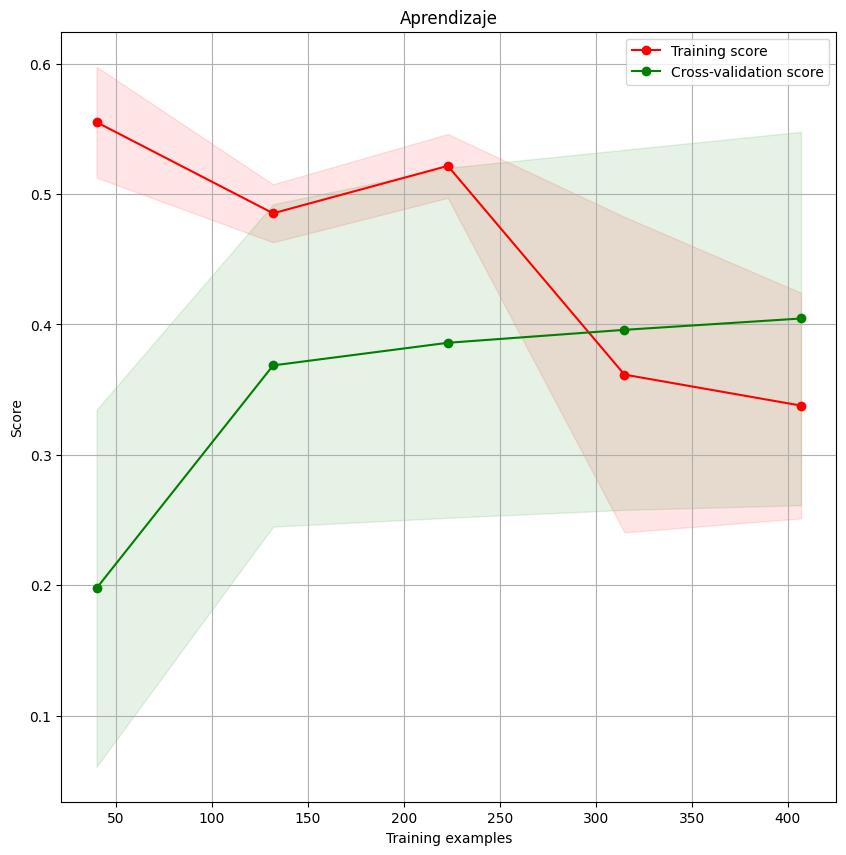

In [ ]:
#Se genera la curva de aprendizaje
plot_learning_curve(estimator=estimator,
                    X=Xtr,
                    y=ytr,
                    title='Aprendizaje')
plt.show()

Las curvas de aprendizaje permiten conocer la estabilidad del modelo. En el modelo anterior se puede evidenciar un caso de bias o sesgo, ya que los modelos no tienden a presentar una convergencia adecuada, es decir los datos no presentan una mejora en los datos de validación del modelo utilizado y los datos de entrenamiento tienden a disminuir, pero un valor de aproximadamente 0.28 presentan un aumento.